**Information Management**

Fall 2020

Big HomeWork

Enter your full name here

Enter your group number here

**Temperature Data Analysis**

In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline

In [395]:
df = pd.read_csv('https://raw.githubusercontent.com/ternikov/hse/gh-pages/hw5/temp_data.csv', delimiter=',')

In [396]:
df.head()

,year,month,temp
0,1952.0,1.0,-1.400966
1,1952.0,2.0,-4.000000
2,1952.0,3.0,-10.106838
3,1952.0,4.0,4.226190
4,1952.0,5.0,7.037037


In [397]:
df.isnull().values.any()

False

Task 1. Find out average temperatures by combinations of years and seasons (Winter, Spring, Summer, Autumn).

In [398]:
df.groupby([df['year']])['temp'].mean()

year
1952.0    3.757214
1953.0    5.446343
1954.0    4.619005
1955.0    3.383767
1956.0    2.573184
1957.0    4.673783
1958.0    3.351692
1959.0    5.507417
1960.0    4.243482
1961.0    5.911646
1962.0    3.879871
1963.0    4.079071
1973.0    4.665696
1974.0    5.897273
1975.0    6.271360
1976.0    3.477420
1977.0    4.108462
1978.0    3.162336
1979.0    4.143134
1980.0    3.965213
1981.0    4.203974
1982.0    4.851518
1983.0    5.370072
1984.0    5.285121
1985.0    2.584464
1986.0    3.987139
1987.0    2.602751
1988.0    5.176140
1989.0    6.558966
1990.0    6.074206
1991.0    5.576140
1992.0    5.851435
1993.0    4.857282
1994.0    4.802672
1995.0    5.659296
1996.0    4.420376
1997.0    5.550183
1998.0    5.001045
1999.0    6.161692
2000.0    6.944620
2001.0    5.480372
2002.0    5.819405
2003.0    5.137339
2004.0    5.351474
2005.0    5.862093
2006.0    6.119567
2007.0    6.333316
2008.0    6.976366
2009.0    5.497810
2010.0    4.425698
2011.0    6.666517
2012.0    5.228725
2013.0 

In [399]:
look_up = {1.0: 'winter', 2.0: 'winter', 
           3.0: 'spring', 4.0: 'spring', 5.0: 'spring',
            6.0: 'summer', 7.0: 'summer', 
           8.0: 'summer', 9.0: 'autumn', 
           10.0: 'autumn', 11.0: 'autumn', 12.0: 'winter'}

df['month'] = df['month'].apply(lambda x: look_up[x])

In [400]:
df.groupby([df['month']])['temp'].mean()

month
autumn     5.551335
spring     3.713746
summer    15.866258
winter    -4.865533
Name: temp, dtype: float64

Task 2. Reproduce the chart (pay attention on all details) that is given below.

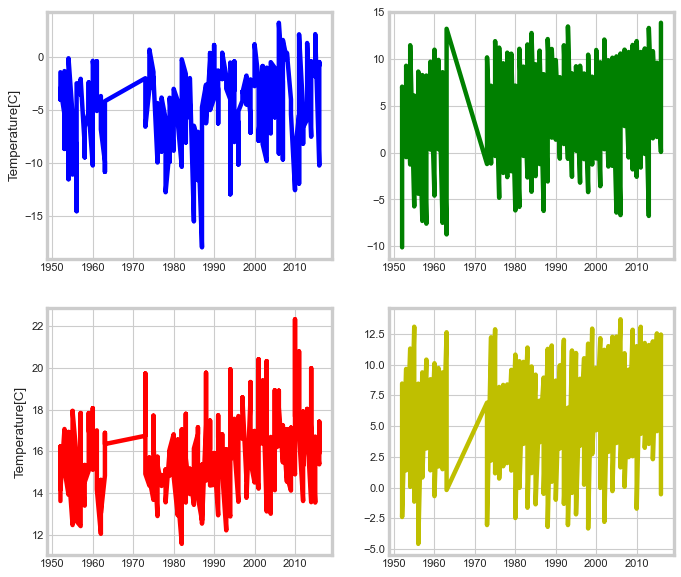

In [401]:
plt.figure(figsize=(9,9), dpi=80)

df_winter = df.loc[(df['month']=='winter')]
df_spring = df.loc[(df['month']=='spring')]
df_summer = df.loc[(df['month']=='summer')]
df_autumn = df.loc[(df['month']=='autumn')]
x = df_winter['year']
y1 = df_winter['temp']
y2 = df_spring['temp']
y3 = df_summer['temp']
y4 = df_autumn['temp']


plt.subplot(2, 2, 1)
plt.plot(x, y1, color = 'b')
plt.ylabel("Temperature[C]") 
plt.subplot(2, 2, 2)
plt.plot(x, y2, color = 'g')
plt.subplot(2, 2, 3)
plt.plot(x, y3, color = 'r')
plt.ylabel("Temperature[C]") 
plt.subplot(2, 2, 4)
plt.plot(x, y4, color = 'y')
plt.show()


Task 3. Using train.csv dataset, split it in two parts at random (use supporting code below) for train_sample (80% of observations) and test_sample (20% of observations). Perform two linear regression models for price_doc prediction for train_sample (use both numeric and categorical independent variables in your models).

In [10]:
import zipfile

zf = zipfile.ZipFile('train.csv.zip') 
df2 = pd.read_csv(zf.open('train.csv'))

In [11]:
df2.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [12]:
df2 = df2.fillna(0) 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numerical = df2.select_dtypes(include=numerics)
df_categorical = df2.select_dtypes(exclude=numerics)
df_categorical = df_categorical.drop(['sub_area'], axis=1)
df_categorical = pd.get_dummies(df_categorical, prefix=df_categorical.columns)

from sklearn.feature_selection import VarianceThreshold
var_thresh = 0.75
thresholder = VarianceThreshold(threshold=(var_thresh * (1 - var_thresh)))
thresholder.fit(df_numerical)
df_numerical = df_numerical[df_numerical.columns[thresholder.get_support(indices=True)]]

In [13]:
df2

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,0.0,0.0,0.0,0.0,0.0,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,0.0,0.0,0.0,0.0,0.0,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,0.0,0.0,0.0,0.0,0.0,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,0.0,0.0,0.0,0.0,0.0,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,0.0,0.0,0.0,0.0,0.0,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,0.0,10.0,20.0,1.0,0.0,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
train_sample, test_sample = train_test_split(df_numerical, test_size=0.2)
y = train_sample['price_doc']
del train_sample['price_doc']
X = train_sample
reg = LinearRegression().fit(X, y)

In [15]:
y_test = test_sample['price_doc']
del test_sample['price_doc']

In [16]:
y_pred = reg.predict(test_sample)

[Text(0, 0.5, 'Predicted'), Text(0.5, 0, 'Actual')]

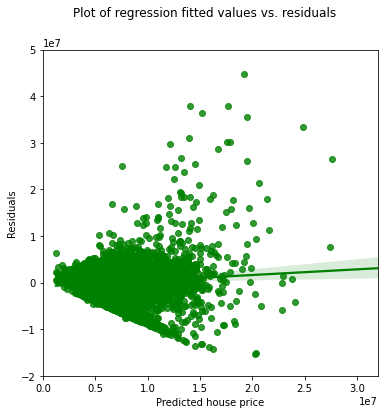

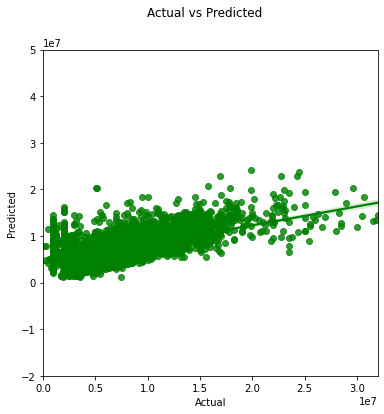

In [17]:
resid = y_test - y_pred
fig,axes = plt.subplots(figsize=(6,6))
fig.suptitle("Plot of regression fitted values vs. residuals")
ax = sns.regplot(x=y_pred, y=resid, color='g')
plt.ylim(-2e7, 5e7)
plt.xlim(0, 3.2e7)
ax.set(xlabel='Predicted house price', ylabel='Residuals')

# Plot actual vs. predicted values
fig,axes = plt.subplots(figsize=(6,6))
fig.suptitle("Actual vs Predicted")
ax = sns.regplot(x=y_test, y=y_pred, color='g')
plt.ylim(-2e7, 5e7)
plt.xlim(0, 3.2e7)
ax.set(xlabel='Actual', ylabel='Predicted')


This coefficient indicates that the data is predicted with 50% accuracy.

In [18]:

print('Mean Absolute Percentage Error (test): {:.3f}'
    .format(np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))))

Mean Absolute Percentage Error (test): 0.531


In [19]:
lasso = Lasso().fit(X,y)
y_pred = lasso.predict(test_sample)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.626274278872687e+17, tolerance: 55227095168648.56
  model = cd_fast.enet_coordinate_descent(


[Text(0, 0.5, 'Predicted'), Text(0.5, 0, 'Actual')]

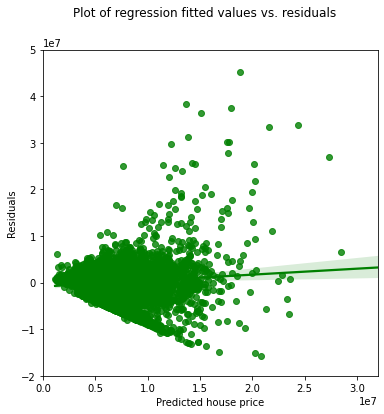

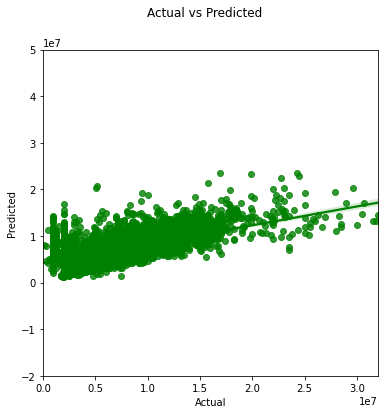

In [20]:
resid = y_test - y_pred
fig,axes = plt.subplots(figsize=(6,6))
fig.suptitle("Plot of regression fitted values vs. residuals")
ax = sns.regplot(x=y_pred, y=resid, color='g')
plt.ylim(-2e7, 5e7)
plt.xlim(0, 3.2e7)
ax.set(xlabel='Predicted house price', ylabel='Residuals')

# Plot actual vs. predicted values
fig,axes = plt.subplots(figsize=(6,6))
fig.suptitle("Actual vs Predicted")
ax = sns.regplot(x=y_test, y=y_pred, color='g')
plt.ylim(-2e7, 5e7)
plt.xlim(0, 3.2e7)
ax.set(xlabel='Actual', ylabel='Predicted')


This coefficient indicates that the data is predicted with 50% accuracy.

In [21]:
print('Mean Absolute Percentage Error (test): {:.3f}'
    .format(np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))))

Mean Absolute Percentage Error (test): 0.533


Task 6. Upload data for one ticker (for the recent year) from Yahoo Finance. Make brief exploratory analysis of obtained data.

In [22]:
import fix_yahoo_finance as yf
from pandas_datareader import data as pdr

In [23]:
data = pdr.get_data_yahoo("SPY", start="2019-01-01", end="2020-09-30")

In [24]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,251.210007,245.949997,245.979996,250.179993,126925200.0,242.056915
2019-01-03,248.570007,243.669998,248.229996,244.210007,144140700.0,236.280746
2019-01-04,253.110001,247.169998,247.589996,252.389999,142628800.0,244.195160
2019-01-07,255.949997,251.690002,252.690002,254.380005,103139100.0,246.120560
2019-01-08,257.309998,254.000000,256.820007,256.769989,102512600.0,248.432953


In [25]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,441.000000,441.000000,441.000000,441.000000,4.410000e+02,441.000000
mean,300.907098,296.916508,298.968390,299.077596,8.737585e+07,293.866450
std,23.188711,24.076981,23.759921,23.579273,5.688787e+07,24.997841
min,229.679993,218.259995,228.190002,222.949997,2.027000e+07,221.088181
25%,286.230011,281.850006,284.399994,284.649994,5.388890e+07,277.966187
50%,298.500000,295.459991,297.179993,297.170013,7.167190e+07,291.129669
75%,318.109985,314.130005,316.369995,317.049988,9.548200e+07,313.438690
max,358.750000,353.429993,355.869995,357.700012,3.922207e+08,356.273865


In [26]:
data.isnull().values.sum()

0

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 441 entries, 2019-01-02 to 2020-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       441 non-null    float64
 1   Low        441 non-null    float64
 2   Open       441 non-null    float64
 3   Close      441 non-null    float64
 4   Volume     441 non-null    float64
 5   Adj Close  441 non-null    float64
dtypes: float64(6)
memory usage: 24.1 KB


Text(0.5, 0, 'High')

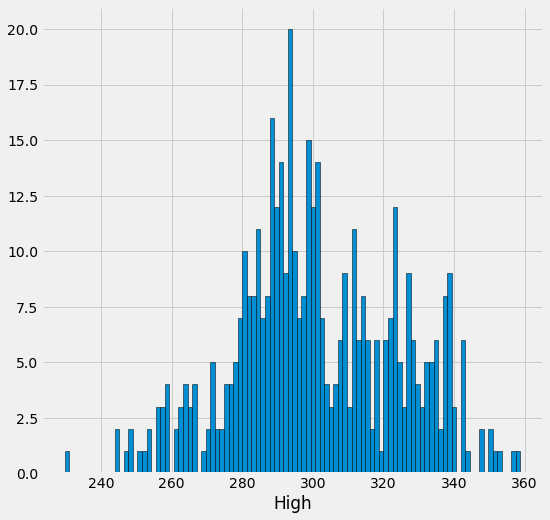

In [28]:
from IPython.core.pylabtools import figsize
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.hist(data['High'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('High')

Text(0.5, 0, 'Low')

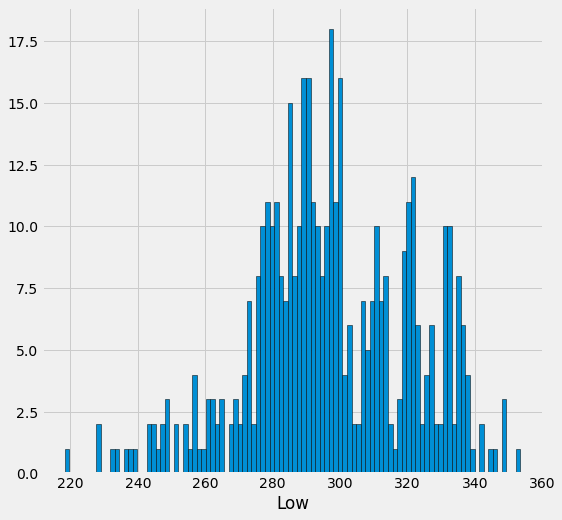

In [29]:

figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.hist(data['Low'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Low')

Text(0.5, 0, 'Open')

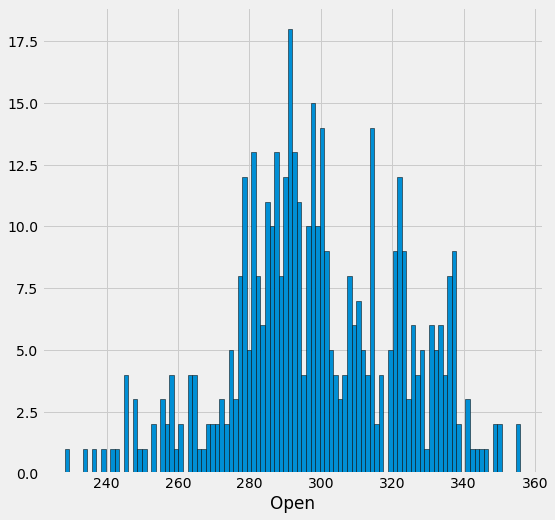

In [30]:
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.hist(data['Open'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Open')

Text(0.5, 0, 'Close')

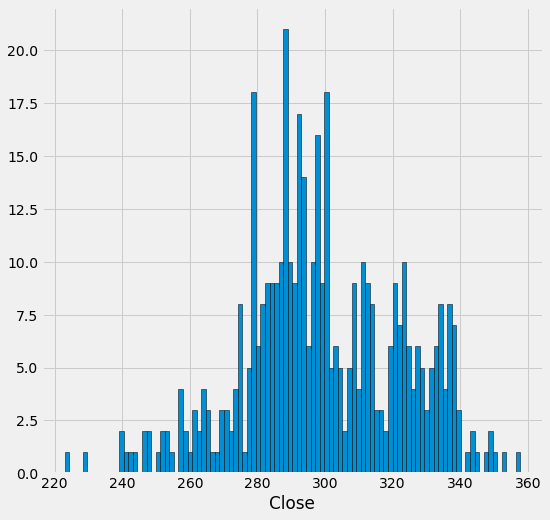

In [31]:
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.hist(data['Close'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Close')

Text(0.5, 0, 'Adj Close')

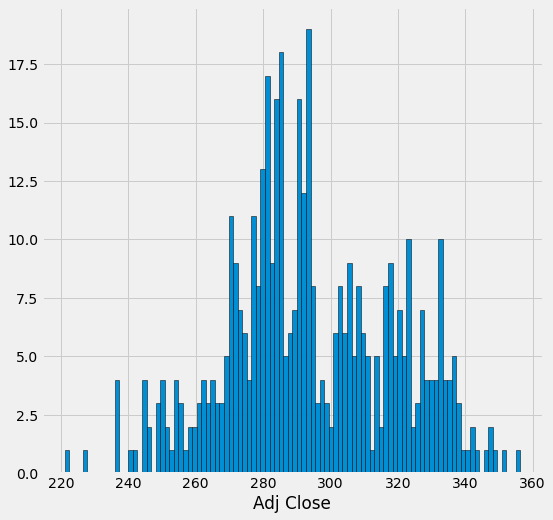

In [32]:
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.hist(data['Adj Close'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Adj Close')

Text(0.5, 0, 'Volume')

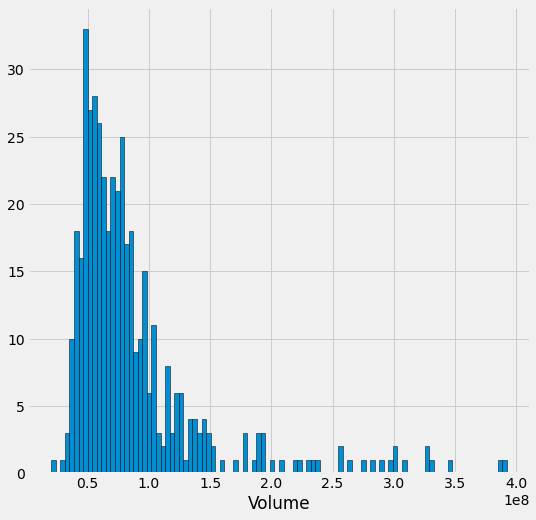

In [33]:
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.hist(data['Volume'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Volume')

Task 7. Apply KNN classifier to obtained data. Assess the quality of the model. Create and briefly justify the trading strategy.

In [36]:
data = data[['Open', 'High', 'Low', 'Close']]
data['Open-Close'] = data.Open - data.Close
data['High-Low'] = data.High - data.Low
data = data.dropna()

X = data[['Open-Close', 'High-Low']] 

Y = np.where(data['Close'].shift(-1) > data['Close'],1,-1)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)

accuracytrain = accuracy_score(y_train, knn.predict(X_train))
accuracytest = accuracy_score(y_test,knn.predict(X_test))

In [43]:
accuracytrain

0.5932203389830508

In [44]:
accuracytest

0.5136986301369864

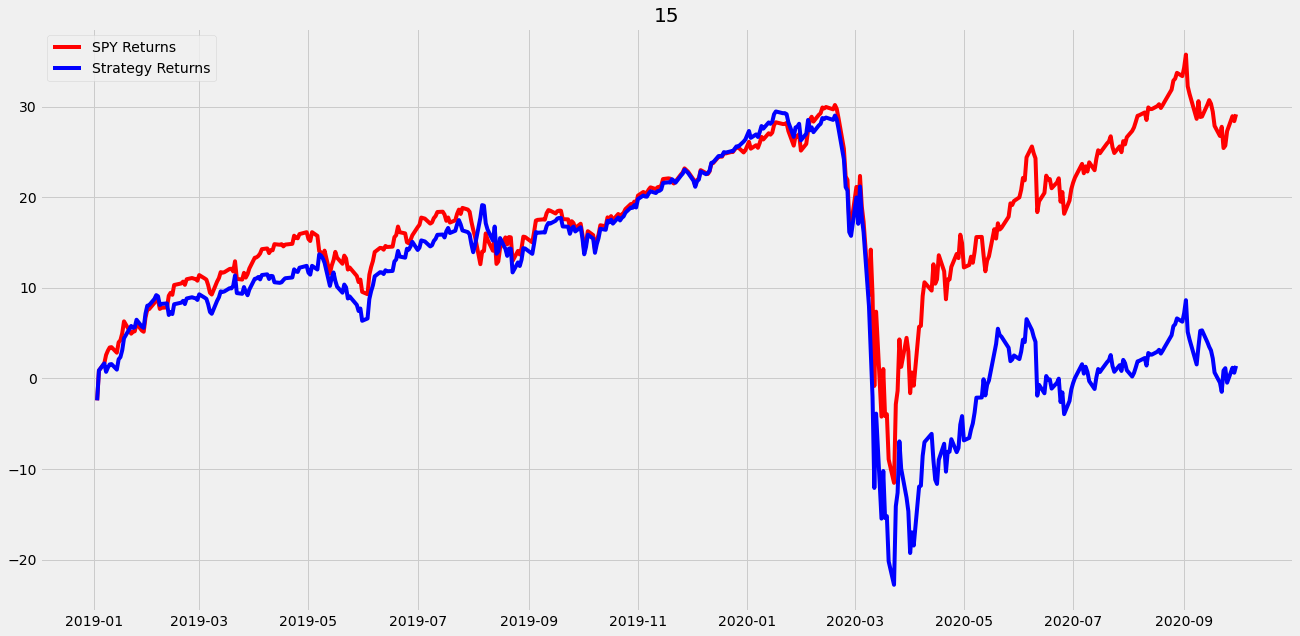

In [50]:
data['Predicted_Signal'] = knn.predict(X)

data['SPY_Returns'] = np.log(data['Close']/data['Close'].shift(1))
Cumulative_SPY_Returns = data['SPY_Returns'].cumsum()*100

#Cumulative Strategy Returns
data['Strategy_Returns'] = data['SPY_Returns']*data['Predicted_Signal'].shift(1)
Cumulative_Strategy_Returns = data['Strategy_Returns'].cumsum()*100

##Plots
plt.figure(figsize=(20,10))
plt.plot(Cumulative_SPY_Returns, color = 'r', label = 'SPY Returns')
plt.plot(Cumulative_Strategy_Returns, color = 'b', label = 'Strategy Returns')
plt.title(str(15))
plt.legend()
plt.show()

Task 8. Upload data for one ticker (for the recent year) from Quandl. Make brief exploratory analysis of obtained data.

In [54]:
import quandl
df_q = quandl.get("WIKI/GOOGL")
df_q.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [55]:
df_q.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03,3424.000000,3424.0,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03
mean,596.602610,602.045438,590.571710,596.352862,7.818568e+06,0.165880,1.0,409.221461,412.786556,405.227809,409.057885,7.818568e+06
std,226.989782,227.783310,225.846581,226.896692,8.248211e+06,9.706436,0.0,257.844081,259.366718,255.981628,257.773495,8.248211e+06
min,99.090000,101.740000,95.960000,100.010000,5.211410e+05,0.000000,1.0,49.698414,51.027517,48.128568,50.159839,5.211410e+05
25%,461.157500,465.392500,456.065000,461.205000,2.430647e+06,0.000000,1.0,231.292728,233.416785,228.738594,231.316552,2.430647e+06
50%,565.120000,569.599950,559.860000,564.940000,5.076200e+06,0.000000,1.0,300.174109,302.496277,297.909618,300.264387,5.076200e+06
75%,735.627500,740.850000,728.680025,733.262500,1.020910e+07,0.000000,1.0,561.178118,565.000000,556.673036,561.200000,1.020910e+07
max,1226.800000,1228.880000,1218.600000,1220.170000,8.215110e+07,567.971668,1.0,1188.000000,1198.000000,1184.060000,1187.560000,8.215110e+07


In [57]:
df_q.isnull().values.sum()

0

In [60]:
df_q.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3424 entries, 2004-08-19 to 2018-03-27
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         3424 non-null   float64
 1   High         3424 non-null   float64
 2   Low          3424 non-null   float64
 3   Close        3424 non-null   float64
 4   Volume       3424 non-null   float64
 5   Ex-Dividend  3424 non-null   float64
 6   Split Ratio  3424 non-null   float64
 7   Adj. Open    3424 non-null   float64
 8   Adj. High    3424 non-null   float64
 9   Adj. Low     3424 non-null   float64
 10  Adj. Close   3424 non-null   float64
 11  Adj. Volume  3424 non-null   float64
dtypes: float64(12)
memory usage: 347.8 KB


Text(0, 0.5, 'Opening value')

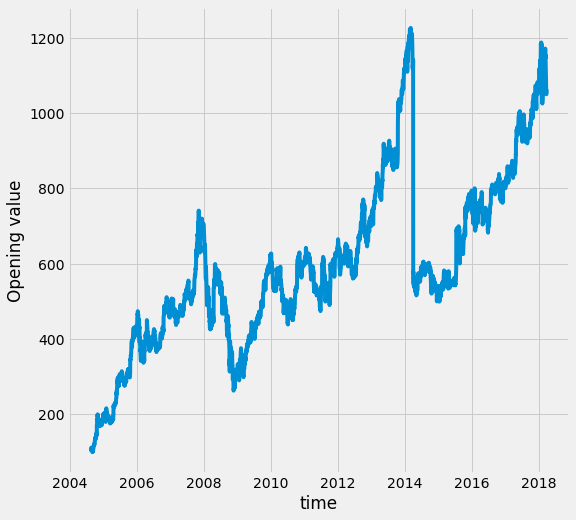

In [78]:

plt.plot( df_q['Open'] )
plt.xlabel('time')
plt.ylabel('Opening value')

Text(0, 0.5, 'Opening value')

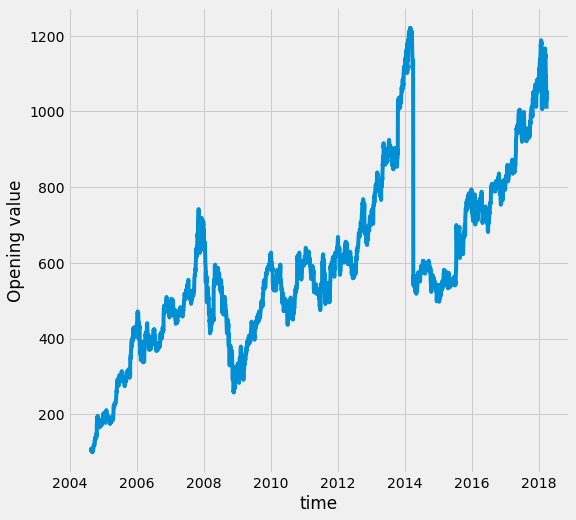

In [79]:
plt.plot( df_q['Close'] )
plt.xlabel('time')
plt.ylabel('Opening value')

Text(0, 0.5, 'Opening value')

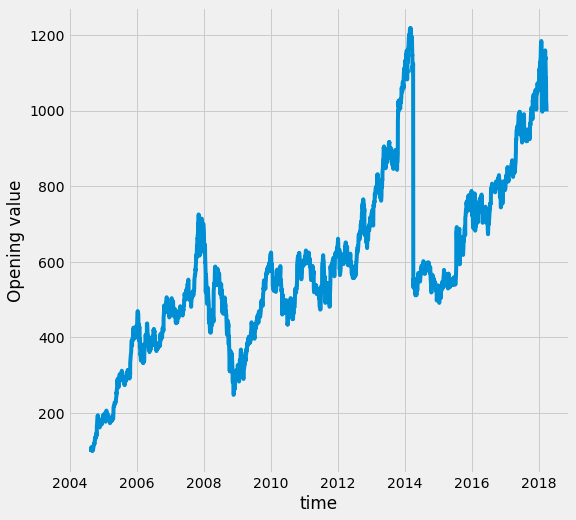

In [83]:
plt.plot( df_q['Low'] )
plt.xlabel('time')
plt.ylabel('Opening value')

Text(0, 0.5, 'Opening value')

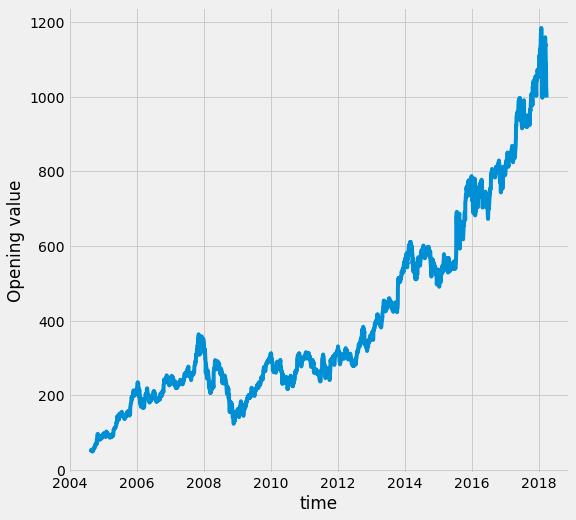

In [87]:
plt.plot( df_q['Adj. Low'] )
plt.xlabel('time')
plt.ylabel('Opening value')

Task 9. Apply Decision Tree to obtained data. Assess the quality of the model. Create and briefly justify the trading strategy.

In [94]:
df_q = df_q[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]

In [95]:
df_q['HL_PCT'] = (df_q['Adj. High'] - df_q['Adj. Low']) / df_q['Adj. Low'] * 100.0
df_q['PCT_change'] = (df_q['Adj. Close'] - df_q['Adj. Open']) / df_q['Adj. Open'] * 100.0

In [96]:
import math
label_col='Adj. Close' 
df_q.fillna(-99999, inplace=True)
future_data = int(math.ceil(0.01 * len(df_q))) #1 pc of the data

print(future_data)

35


In [106]:
df_q['label'] = df_q[label_col].shift(-future_data)
df_q.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change,label
Date,,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,8.441017,0.324968,69.078238
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,8.537313,7.227007,67.839414
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,4.062357,-1.227880,68.912727
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,7.753210,-5.726357,70.668146
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,3.966115,1.183658,71.219849


In [107]:
from sklearn import preprocessing, model_selection
X = np.array(df_q.drop(['label'], 1)) 
X = preprocessing.scale(X)
X_lately = X[-future_data:] 
X = X[:-future_data] 
df_q.dropna(inplace=True) 
y = np.array(df_q['label']) 

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [111]:
from sklearn import tree
dt_clf = tree.DecisionTreeRegressor()
dt_clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [114]:
print("Prediction using Decision Tree Regressor:\n\n")

dt_accuracy = dt_clf.score(X_test, y_test)
print("Accuracy score =", dt_accuracy)

dt_predicted_set = dt_clf.predict(X_test)
print("\nPredicted Price:\n", dt_predicted_set)

Prediction using Decision Tree Regressor:


Accuracy score = 0.9669579758995811

Predicted Price:
 [ 378.08210323  350.33645508  308.44213131  211.91917419  130.00130156
  201.86814763  232.75348772  666.98        236.75584261  283.47506035
  293.77686103  204.05489792  598.44        718.56        592.31341477
  171.8755634   435.15829196  233.97224992 1072.          202.64554739
  226.52927417  254.08934948  749.38        688.73        294.03265062
  517.54260444  103.29887373 1103.92        196.10535845 1084.43
  336.39341424  214.31155925  207.45037945  659.69        938.93
  271.00155584  454.88919938  270.43480634  543.          262.82631967
  706.89       1117.51         86.98350976  266.02619739 1143.7
  753.41        691.47        305.7237399   267.56093497  829.88
  924.52        239.27361473  889.14        563.77        540.63
  287.59277133  250.00173139  267.72644589  279.61313897  717.22
  548.7         461.54474441  214.31155925  191.07482969  245.50785924
  201.68759027 

In [116]:
dt_clf_predicted_combined = dt_clf.predict(X_lately)
print("\nPredicted Price:\n",dt_clf_predicted_combined)


Predicted Price:
 [1006.94 1143.5   945.5  1006.94 1171.29 1084.43 1115.04 1115.04 1073.21
 1128.09 1115.04 1139.91 1139.91 1117.51 1150.61 1143.5  1143.5  1109.9
 1139.91 1094.76 1100.9  1117.51 1100.9  1100.07 1150.61 1100.07 1128.09
 1150.61 1054.09 1115.04 1115.04 1054.09 1143.5  1006.94  945.5 ]


In [119]:
import datetime
df_q['Predicted']=np.nan
print(df_q.tail())
last_date = df_q.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in dt_clf_predicted_combined:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df_q.loc[next_date] = [np.nan for x in range(len(df_q.columns)-1)]+[i]

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume    HL_PCT  \
Date                                                                            
2018-01-30    1177.72    1187.93   1174.51     1177.37    1792602.0  1.142604   
2018-01-31    1183.81    1186.32   1172.10     1182.22    1643877.0  1.213207   
2018-02-01    1175.99    1187.45   1169.36     1181.59    2774967.0  1.547000   
2018-02-02    1127.42    1131.30   1111.17     1119.20    5798880.0  1.811604   
2018-02-05    1100.61    1114.99   1056.74     1068.76    3742469.0  5.512236   

            PCT_change    label  Predicted  
Date                                        
2018-01-30   -0.029718  1094.00        NaN  
2018-01-31   -0.134312  1053.15        NaN  
2018-02-01    0.476195  1026.55        NaN  
2018-02-02   -0.729098  1054.09        NaN  
2018-02-05   -2.893850  1006.94        NaN  


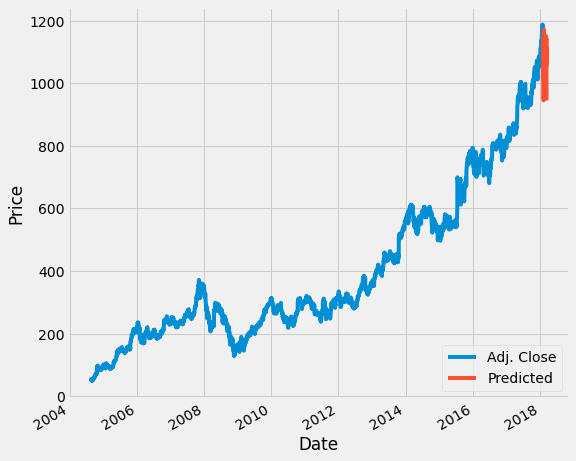

In [120]:
df_q[-future_data:] 
df_q['Adj. Close'].plot()
df_q['Predicted'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Task 10. Provide the face detection for your photo with rectangular border around your face (use material and examples above).

In [204]:
import cv2

In [205]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [214]:
img = cv2.imread('test.jpg')

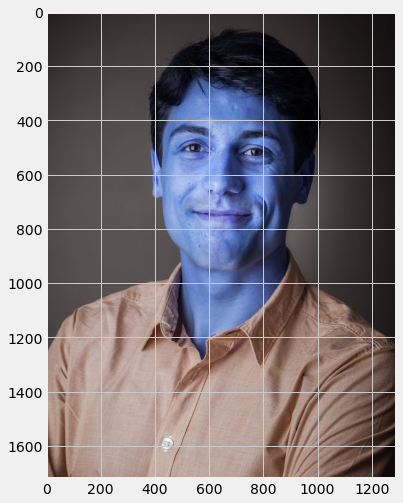

In [215]:
plt.imshow(img)

In [216]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
for (x, y, w, h) in faces: 
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
cv2.imwrite("face_detected.png", img) 
print('Successfully saved')

Successfully saved
